# Lectura y limpieza de datos para el proyecto de Machine Learning

Importamos librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Carga de datos sin procesar

In [2]:
df = pd.read_csv("../data/raw/alzheimers_disease_data.csv")

Comprobamos si hay nulos, el tipo de datos que tenemos y con cuantos datos contamos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [4]:
df.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,5825.000000,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,620.507185,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5288.000000,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5825.000000,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6362.000000,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,6899.000000,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# Quitamos columnas que sabemos que no nos van a hacer falta

df = df.drop(["DoctorInCharge", "PatientID"], axis=1)

In [6]:
# Miramos como están repartidos los datos de la columna objetivo

df["Diagnosis"].value_counts(normalize=True)

Diagnosis
0    0.646347
1    0.353653
Name: proportion, dtype: float64

Vemos las correlaciones con la columna objetivo.

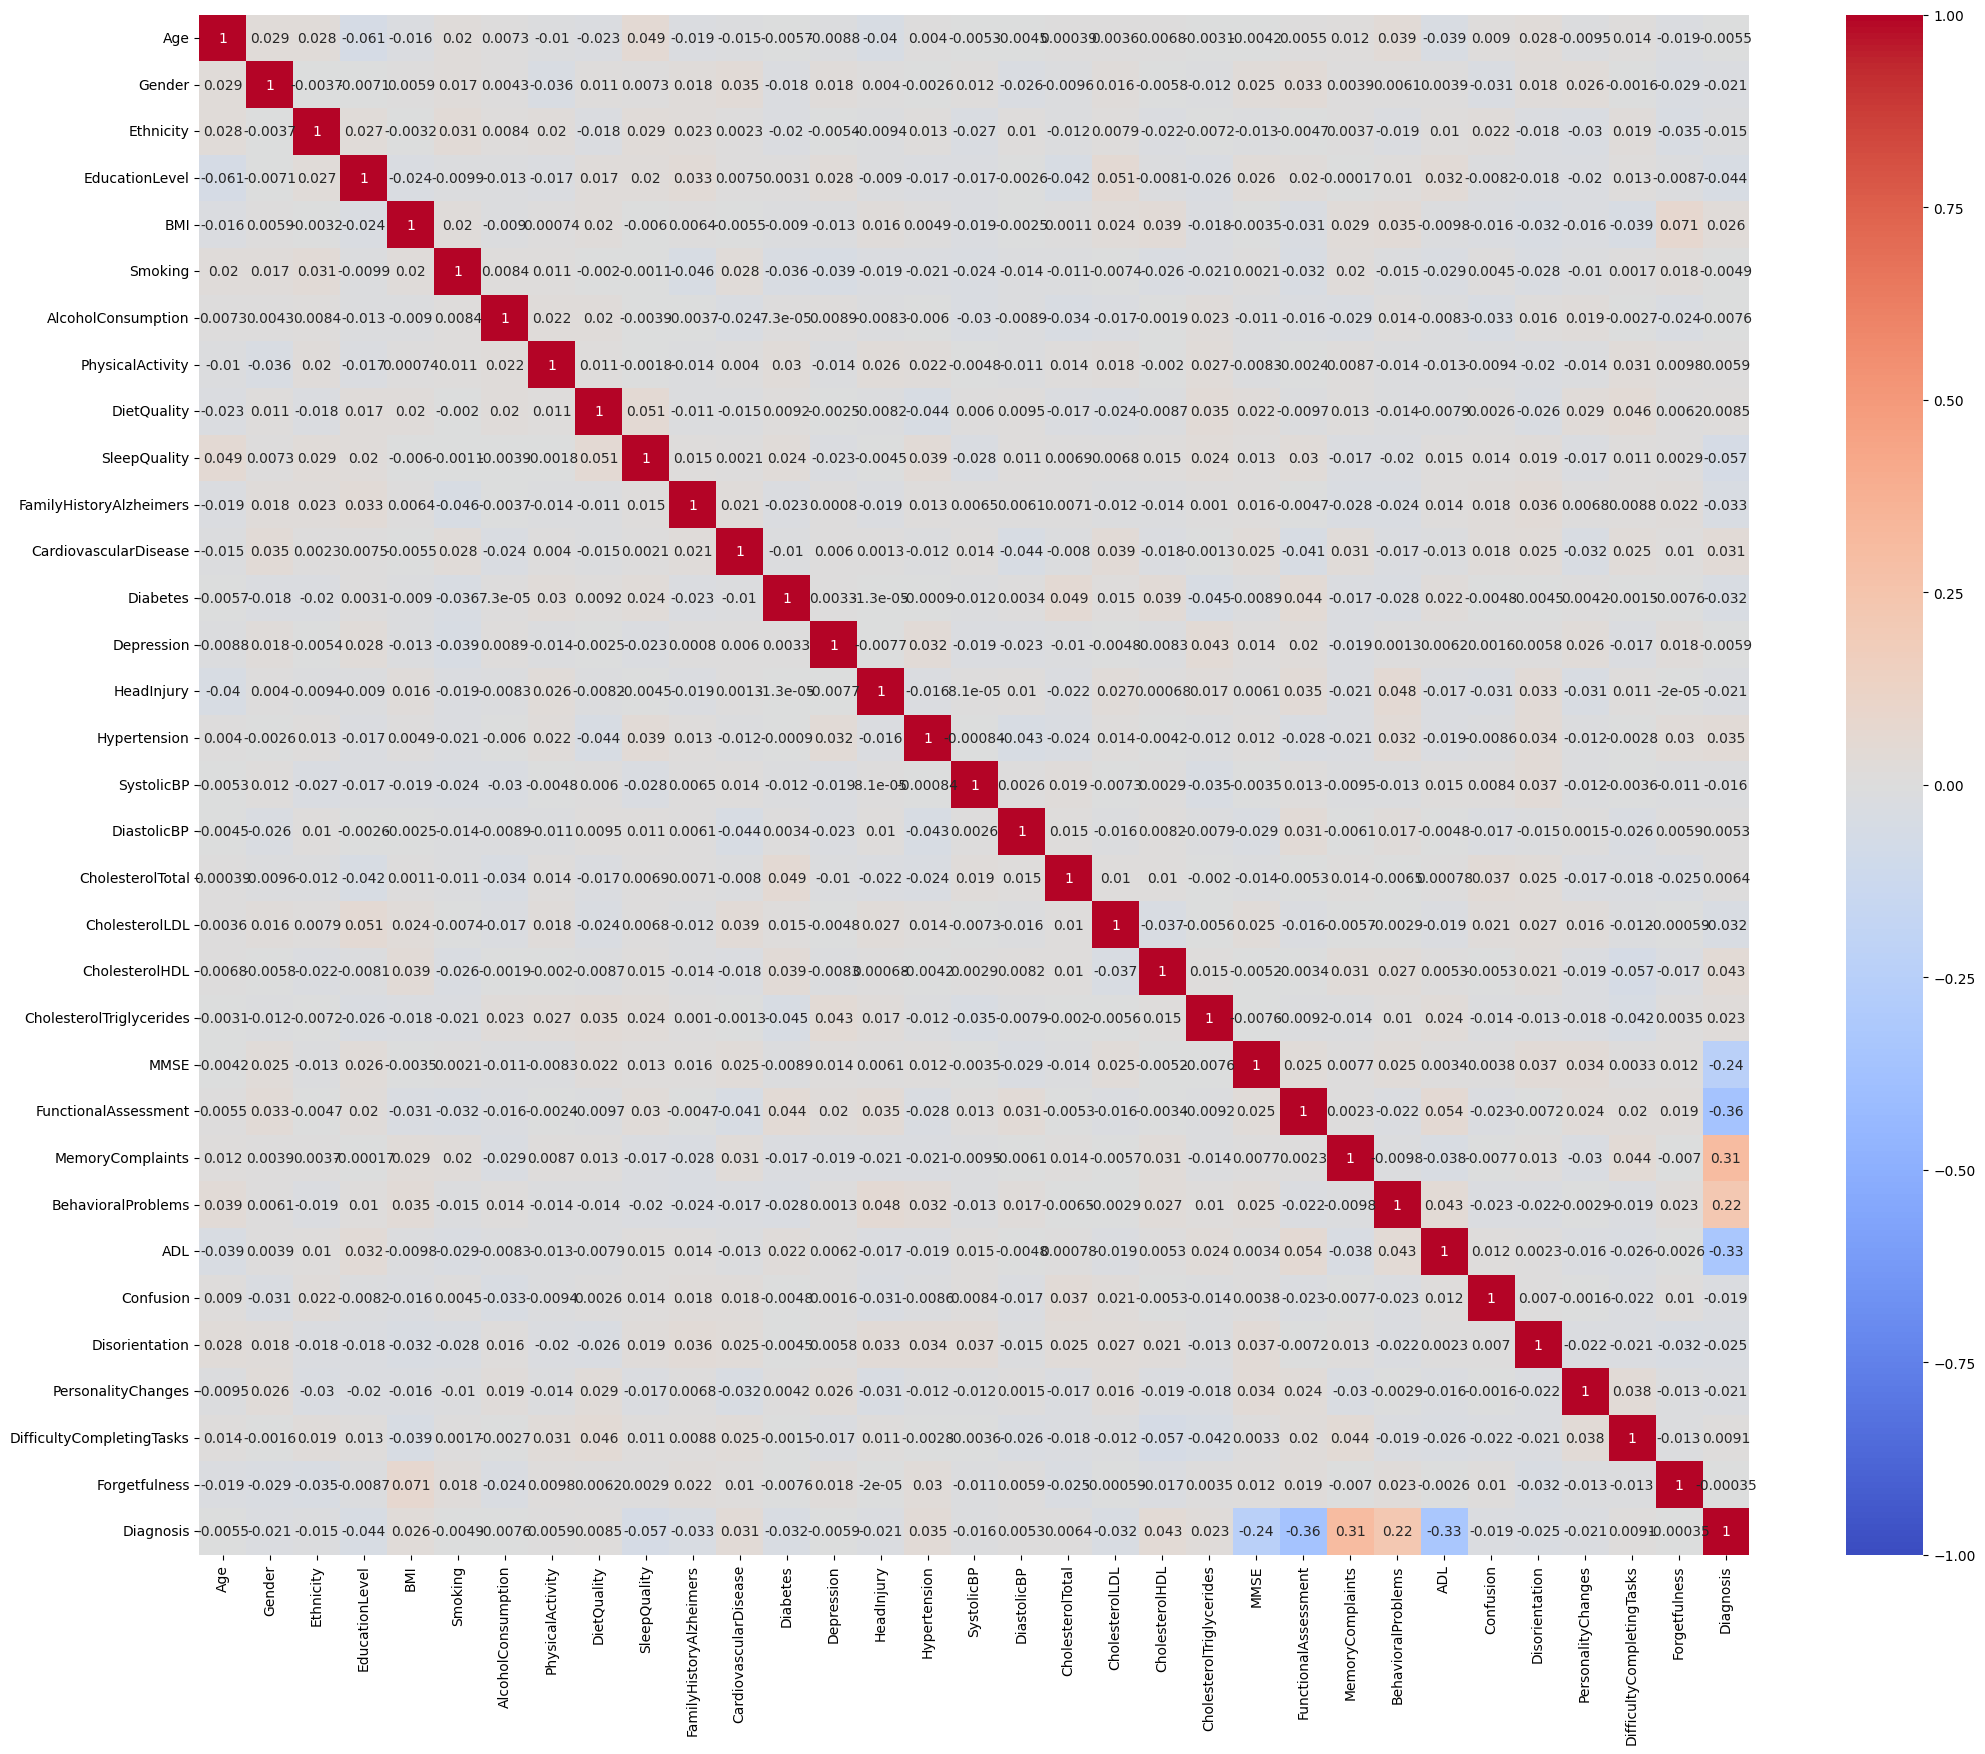

In [7]:
# Mapa de calor de las correlaciones con nuestra target

plt.figure(figsize=(25,20))
sns.heatmap(df.corr(), annot=True, vmin=-1, cmap="coolwarm");

Quitamos las columnas que tienen una correlación más baja

In [8]:
# borramos las columnas con menos correlación

df = df.drop(["CholesterolTotal", "Age", "Smoking", "AlcoholConsumption", "PhysicalActivity", "DietQuality", "Depression", "DiastolicBP", "DifficultyCompletingTasks", "Forgetfulness"], axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    2149 non-null   int64  
 1   Ethnicity                 2149 non-null   int64  
 2   EducationLevel            2149 non-null   int64  
 3   BMI                       2149 non-null   float64
 4   SleepQuality              2149 non-null   float64
 5   FamilyHistoryAlzheimers   2149 non-null   int64  
 6   CardiovascularDisease     2149 non-null   int64  
 7   Diabetes                  2149 non-null   int64  
 8   HeadInjury                2149 non-null   int64  
 9   Hypertension              2149 non-null   int64  
 10  SystolicBP                2149 non-null   int64  
 11  CholesterolLDL            2149 non-null   float64
 12  CholesterolHDL            2149 non-null   float64
 13  CholesterolTriglycerides  2149 non-null   float64
 14  MMSE    

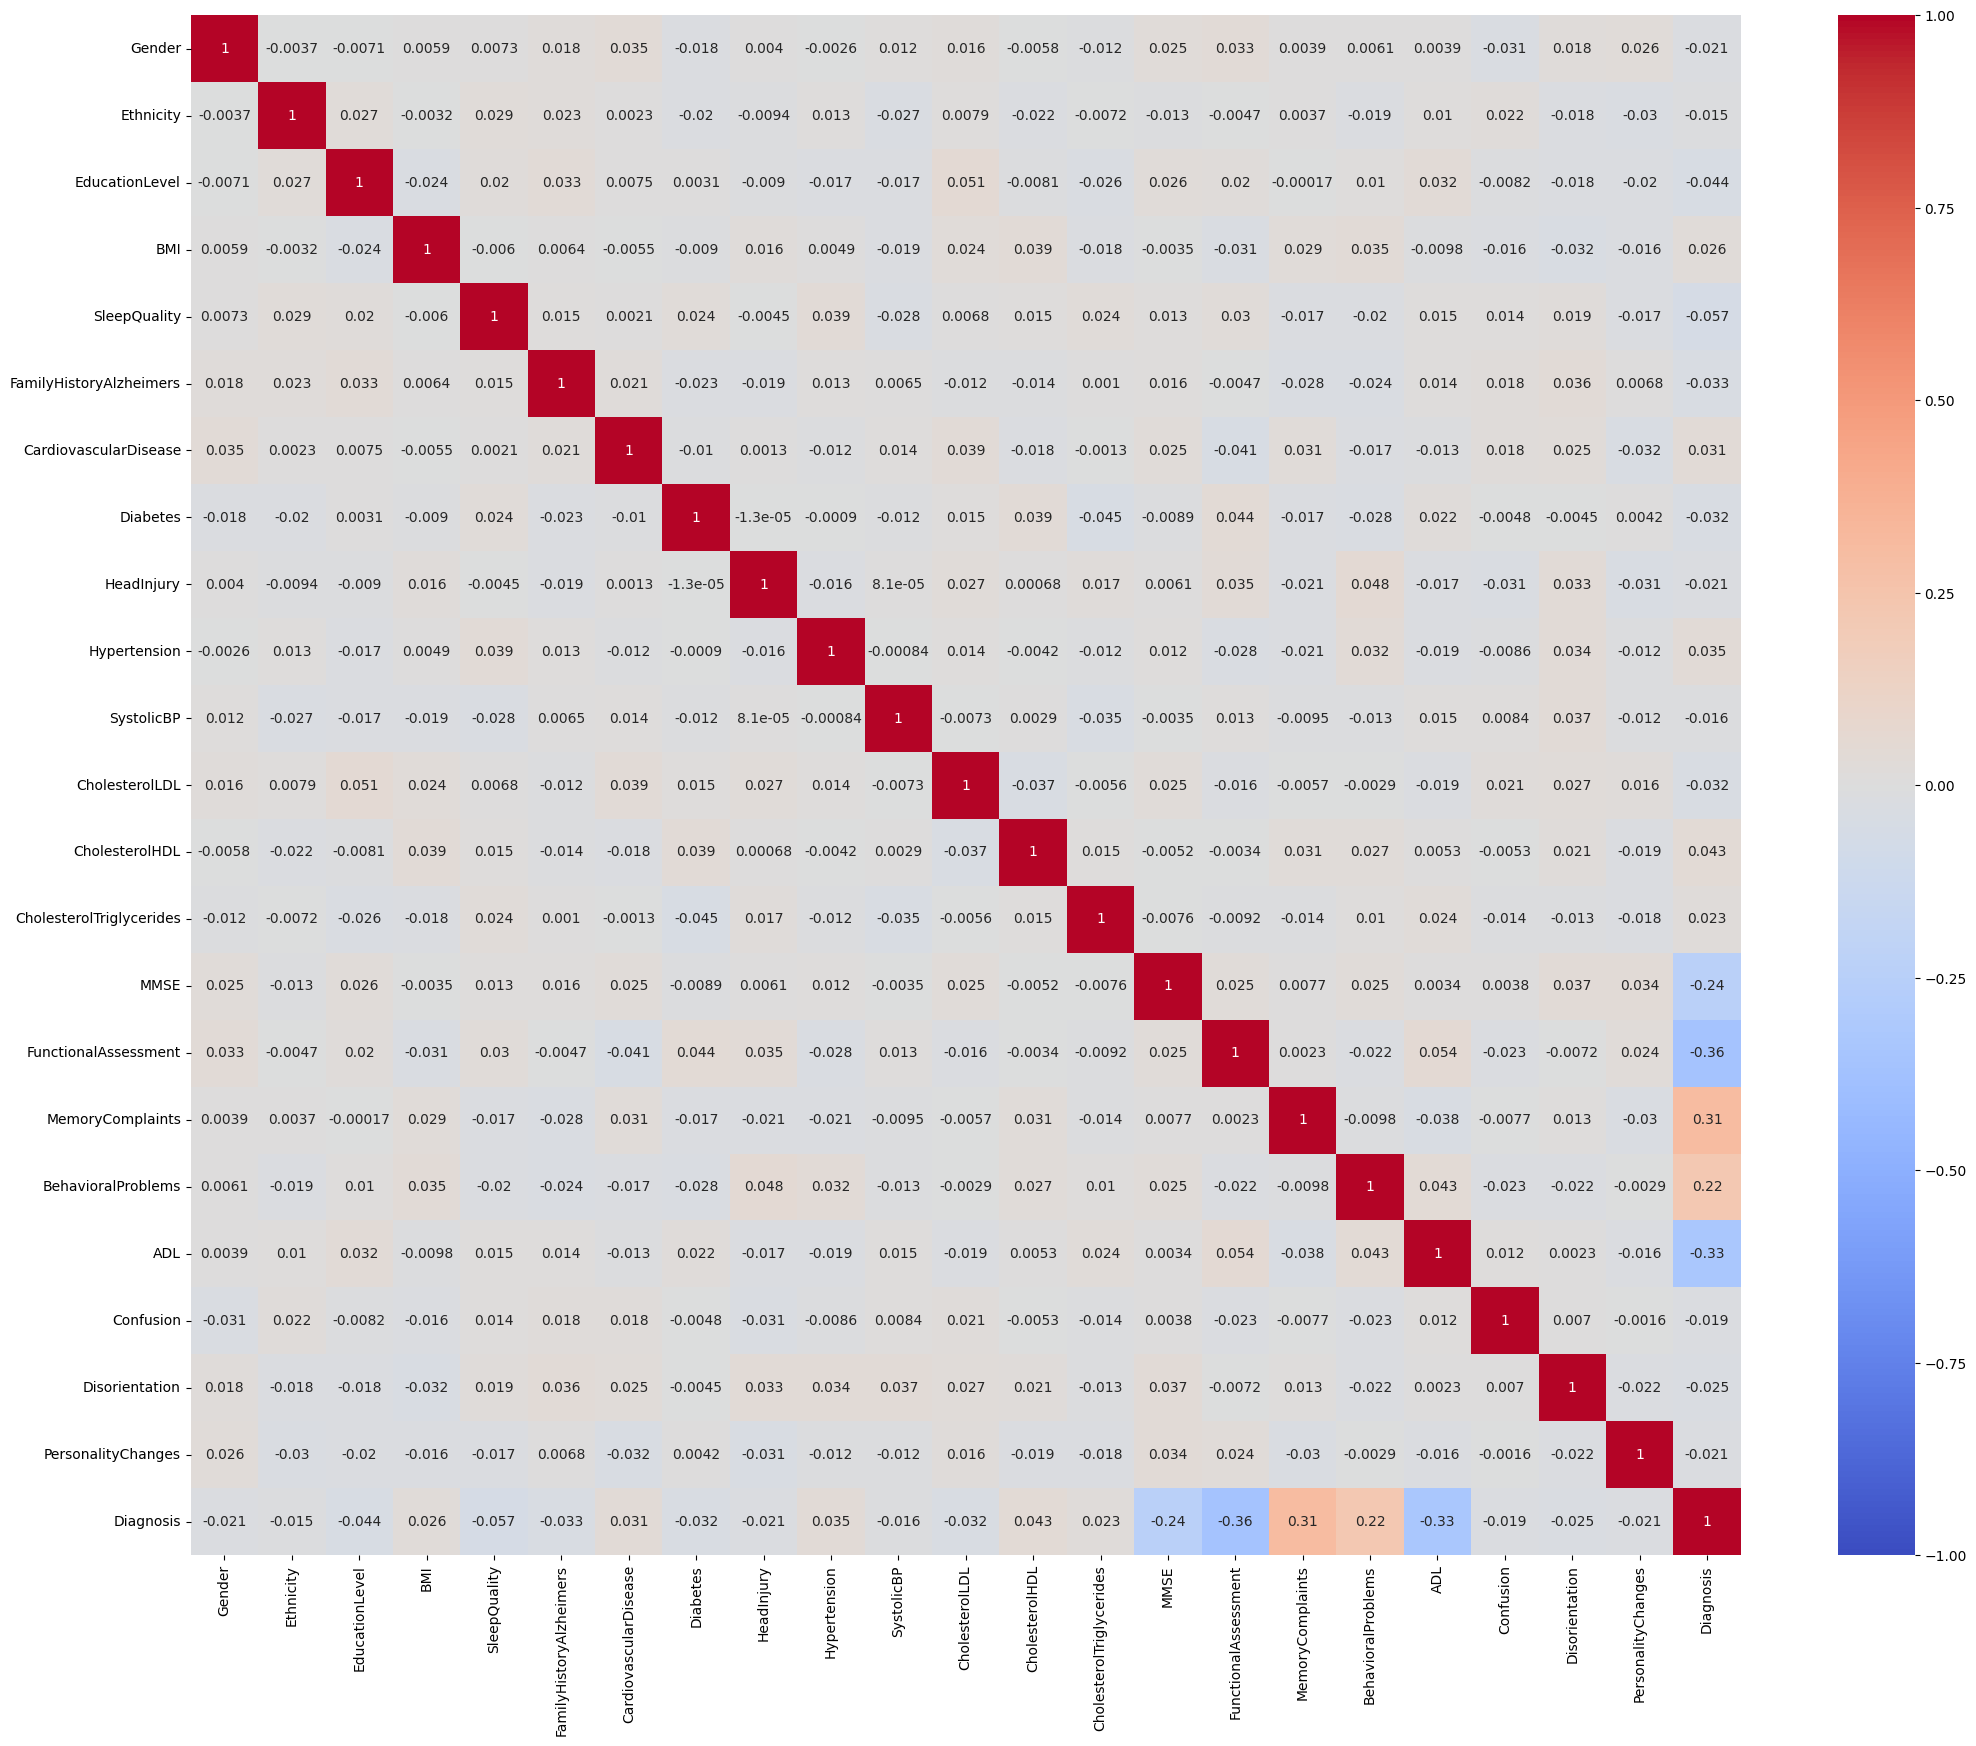

In [10]:
# Mapa de calor con las variables que hemos dejado

plt.figure(figsize=(25,20))
sns.heatmap(df.corr(), annot=True, vmin=-1, cmap="coolwarm");

In [11]:
# Quitamos el resto de columnas que los modelos no están teniendo en cuenta a la hora de entrenarse

df = df.drop(columns=['Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'SleepQuality',
       'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
       'HeadInjury', 'Hypertension', 'SystolicBP', 'CholesterolLDL',
       'CholesterolHDL', 'CholesterolTriglycerides', 'Confusion', 'Disorientation', 'PersonalityChanges'])

In [12]:
df.describe()

,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,14.755132,5.080055,0.208004,0.156817,4.982958,0.353653
std,8.613151,2.892743,0.405974,0.363713,2.949775,0.478214
min,0.005312,0.000460,0.000000,0.000000,0.001288,0.000000
25%,7.167602,2.566281,0.000000,0.000000,2.342836,0.000000
50%,14.441660,5.094439,0.000000,0.000000,5.038973,0.000000
75%,22.161028,7.546981,0.000000,0.000000,7.581490,1.000000
max,29.991381,9.996467,1.000000,1.000000,9.999747,1.000000


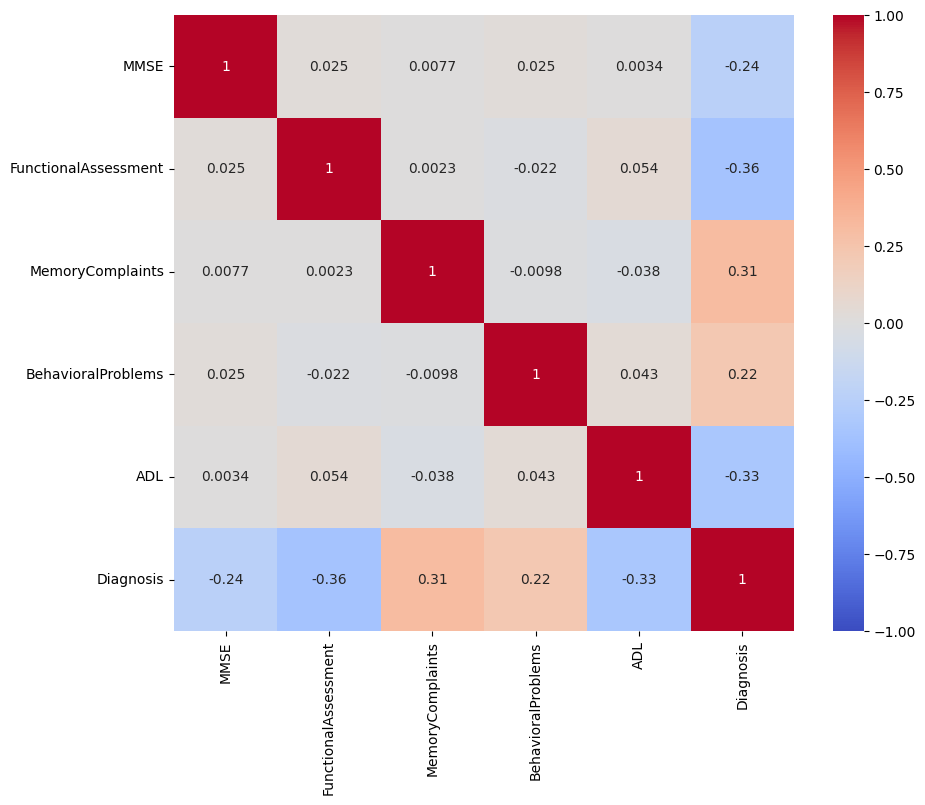

In [20]:
# Un último mapa de calor para ver las correlaciones finales que nos quedan
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, vmin=-1, cmap="coolwarm");

In [23]:
# Guardado de datos limpios

df.to_csv("../data/processed/datos_limpios.csv", index=False)